
# Investigate Business Hotel using Data Visualization

# **Data Preprocessing**



**Import Libary**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
# Print the shape of the DataFrame
print(df.shape)

(119390, 29)


In [4]:
df.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
30852,Resort Hotel,0,0,2018,February,49,3,2,1,2,...,0,No Deposit,NaN,NaN,0,Personal,81.0,1,0,Check-Out
53691,City Hotel,1,59,2018,August,27,27,1,3,2,...,0,No Deposit,9.0,NaN,0,Personal,102.6,0,0,Canceled


In [5]:
# Displaying a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

From this dataframe summary, we can observe the following:

*   There are four columns containing missing values: `children`, `country`, `agent`, and `company`.
*   There are two columns containing datetime data type: `reservation_status_date` and `arrival_date_month`.



In [6]:
# Selecting columns based on data types: categorical and numeric
cats = df.select_dtypes('object')  # Selecting columns with 'object' dtype (typically categorical data)
nums = df.select_dtypes('number')  # Selecting columns with numeric dtypes


In [7]:
# Displaying statistical summaries for categorical variables
display(cats.describe())

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


statistical summaries for categorical variables


*   `hotel`: There are 2 types of hotels: City Hotel and Resort Hotel.
*   `meal`: There are 5 types of meals available, with Breakfast being the most ordered meal.
*   `city`: Reservations come from 177 countries, with Kota Denpasar being the city with the most reservations.
*   `market_segment`: There are 8 types of market segments, and Online TA (Travel Agent) is the most common segment.
*   `distribution_channel`: There are 5 types of distribution channels, with Travel Agent/Tour Operator being the most common channel.
*   `deposit_type`: There are 3 types of deposit types, and No Deposit is the most frequently used type.
*   `customer_type`: There are 4 types of customer types, and Personal Travel is the most common type.
*   `reservation_status`: There are 3 types of reservation statuses, and Check-Out is the most frequent status.




In [8]:
# Displaying statistical summaries for numerical variables
display(nums.describe())

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


statistical summaries for numerical variables


*   `is_canceled` & `is_repeated_guest`: These columns have values ranging from 0 to 1, indicating they are binary columns.
*   `children` & `babies`: The maximum value observed in these columns is 10, which is uncommonly high.
*   For columns intended to be binary categorical, they will be converted to a binary data type to facilitate analysis.
*   Columns containing negative values (such as `adr`) will have these negative values removed, as negative prices are not feasible.

### Handling Missing Values


Number of missing values per column:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list

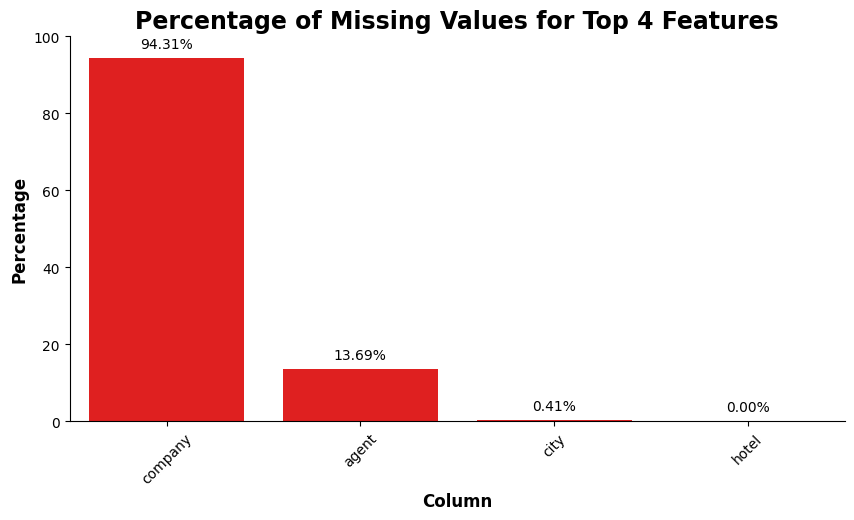

In [9]:
# Create a copy of the dataframe to preserve the original data
df_copy = df.copy()

# Check for missing values in each column
print("Number of missing values per column:")
print(df_copy.isna().sum())

# Check the percentage of missing values
missing_percentages = round(100 * (df_copy.isnull().sum() / len(df_copy)), 2)
print("\nPercentage of missing values per column:")
print(missing_percentages)

# Identify variables with high missing rates (> 10%)
high_missing_vars = df_copy.columns[df.isnull().mean() > 0.1]
print("\nVariables with missing rates > 10%:")
print(high_missing_vars)

# Sort the missing percentages in descending order and select the top 4
top_missing = missing_percentages.sort_values(ascending=False).head(4)

# Visualize the missing data for the top 4 features
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_missing.index, y=top_missing.values, color='red')

# Annotate the bars with the missing percentage values
for p in ax.patches:
    ax.annotate('%.2f%%' % p.get_height(), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Set plot title and axis labels
plt.title('Percentage of Missing Values for Top 4 Features', fontsize=17, fontweight='bold')
sns.despine()
plt.xlabel('Column', fontsize=12, fontweight='bold')
plt.ylabel('Percentage', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

In [10]:
# Impute missing values for the 'agent', 'children', and 'city' columns
df_copy.fillna({'agent': 0, 'children': 0}, inplace=True)
df_copy.fillna({'city':'Unknown'}, inplace=True)

# Drop the 'company' column as it has more than 90% missing values
df_copy.drop(columns=['company'], inplace=True)

In [11]:
# Check for missing values in each column
print("Number of missing values per column:")
print(df_copy.isna().sum())

Number of missing values per column:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests  

From the handling of missing values in the dataset, we can infer the following:

*   '`agent`' and '`children`' Columns: Missing values are replaced with 0. This suggests that in these cases, no `agent` or `children` information was originally provided in the dataset.
*   '`city`' Column: Missing values are filled with 'Unknown'. This approach ensures that records without `city` information can still be included in the analysis, albeit labeled as 'Unknown'.
*   The '`company`' column is removed because more than 90% of the '`company`' column's values were missing. This high rate of missing data makes the column impractical for meaningful analysis or predictions. By removing it, the dataset is simplified, focusing on columns that contain more complete and informative data.






### Replace Values

In [12]:
# Define mappings to categorize numerical columns and change their data types
cancel_mapping = {
    0: 'not canceled',
    1: 'canceled'
}

# Apply mappings and convert 'is_canceled' to categorical data type
df_copy['is_canceled'] = df_copy['is_canceled'].map(cancel_mapping).astype('category')

# Define mappings for 'is_repeated_guest' and change its data type to categorical
repeat_mapping = {
    0: 'first time',
    1: 'repeat'
}

df_copy['is_repeated_guest'] = df_copy['is_repeated_guest'].map(repeat_mapping).astype('category')

Utilize cancel_mapping and repeat_mapping dictionaries to map numerical values (0 and 1) to descriptive categories ('not canceled'/'canceled' and 'first time'/'repeat') in '`is_canceled`' and '`is_repeated_guest`' columns.

In [13]:
# Replace undefined values in 'meal', 'market_segment', and 'distribution_channel' columns with 'Others'
df_copy['meal'] = df_copy['meal'].replace('Undefined', 'Others')
df_copy['market_segment'] = df_copy['market_segment'].replace('Undefined', 'Others')
df_copy['distribution_channel'] = df_copy['distribution_channel'].replace('Undefined', 'Others')

Replacement of undefined values in '`meal`', '`market_segment`', and '`distribution_channel`' columns with 'Others'
The '`meal`' column is replaced with 'Others' for 'Undefined' values.
The '`market_segment`' column is replaced with 'Others' for 'Undefined' values.
The 'distribution_channel' column is replaced with 'Others' for 'Undefined' values.


### Drop Invalid Data

In [14]:
# Count rows where all guests (children, adults, babies) are 0
df_copy[(df_copy['children'] == 0) & (df_copy['adults'] == 0) & (df_copy['babies'] == 0)].shape[0]


180

In [15]:
# Create a new DataFrame excluding rows where all guests are 0
df_copy_clean = df_copy[~((df_copy['children'] == 0) & (df_copy['adults'] == 0) & (df_copy['babies'] == 0))]


There are 180 data records where all guest categories (children, adults, and babies) are zero. A new DataFrame `df_copy_clean` is created excluding these records, ensuring valid booking data with at least one guest specified

# **Monthly Hotel Booking Analysis Based On Month**

### Aggregate table

In [16]:
# Create a copy of the original dataframe to keep the original data safe
dfh = df_copy.copy()

# Group the data by hotel type, year, and month
# Count how many bookings are in each group and create a new column 'count_bookings' for these counts
booking_counts = dfh.groupby(['hotel', 'arrival_date_year', 'arrival_date_month']).size().reset_index(name='count_bookings')

# Sort the booking counts by arrival month for easier analysis
booking_counts = booking_counts.sort_values(by='arrival_date_month')

# Display the result to see what we have
booking_counts


,hotel,arrival_date_year,arrival_date_month,count_bookings
32,Resort Hotel,2018,April,1520
44,Resort Hotel,2019,April,1583
6,City Hotel,2018,April,2371
18,City Hotel,2019,April,2594
45,Resort Hotel,2019,August,1676
33,Resort Hotel,2018,August,1369
7,City Hotel,2018,August,3923
19,City Hotel,2019,August,3971
34,Resort Hotel,2018,December,1984
26,Resort Hotel,2017,December,1571


1.   Interpretation:
The table shows the number of hotel bookings grouped by hotel type, year, and month, and sorted by the month to facilitate analysis. Each row represents the count of bookings for a specific hotel type in a particular month and year.

2.   Summary:
The data has been grouped by hotel type, year, and month, and the number of bookings in each group has been counted. The months have been sorted in order to make it easier to analyze trends over time. This helps in understanding booking patterns for different types of hotels across various months and years.

### Hotel bookings each month based on the type of hotel

In [17]:
# Define the correct order of months
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert the 'arrival_date_month' column to categorical with defined order
# Sorting and visualization of months
booking_counts['arrival_date_month'] = pd.Categorical(
    booking_counts['arrival_date_month'],
    categories=months_order,
    ordered=True
)

# Sort the dataframe by year and month (in the correct order)
booking_counts = booking_counts.sort_values(
    ['arrival_date_year', 'arrival_date_month']
)

# Display sorted aggregated booking counts
booking_counts

,hotel,arrival_date_year,arrival_date_month,count_bookings
28,Resort Hotel,2017,January,1105
2,City Hotel,2017,January,1235
1,City Hotel,2017,February,1654
27,Resort Hotel,2017,February,1266
31,Resort Hotel,2017,September,1378
5,City Hotel,2017,September,1398
30,Resort Hotel,2017,October,1409
4,City Hotel,2017,October,2480
3,City Hotel,2017,November,3529
29,Resort Hotel,2017,November,1585


By converting the '`arrival_date_month`' column into a categorical type with the predefined months order, this code ensures proper sorting and visualization. The `booking_counts` dataframe displays aggregated booking counts sorted chronologically by year and month.

### Normalize The Data

In [18]:
# Generate column combinations of hotel, year, and month
combinations_column = pd.MultiIndex.from_product([
    booking_counts['hotel'].unique(),
    booking_counts['arrival_date_year'].unique(),
    months_order
], names=['hotel', 'arrival_date_year', 'arrival_date_month']).to_frame(index=False)

# Merge with original booking_counts, filling missing combinations with NaN
norm_booking_counts = pd.merge(
    combinations_column,
    booking_counts,
    how='left',
    on=['hotel', 'arrival_date_year', 'arrival_date_month']
)

# Normalize the booking counts by dividing the 2018 counts by 3 to account for the incomplete year
div_counts = booking_counts[
    (booking_counts['arrival_date_year'] == 2018)
][['hotel', 'arrival_date_month', 'count_bookings']].copy()

div_counts['count_bookings'] /= 3
div_counts.set_index(['hotel', 'arrival_date_month'], inplace=True)

# Fill missing booking counts for 2017 and 2019 with normalized 2018 counts
for year in [2017, 2019]:
    for month in months_order:
        for hotel in booking_counts['hotel'].unique():
            mask = (
                (norm_booking_counts['hotel'] == hotel) &
                (norm_booking_counts['arrival_date_year'] == year) &
                (norm_booking_counts['arrival_date_month'] == month)
            )
            norm_booking_counts.loc[mask, 'count_bookings'] = norm_booking_counts.loc[
                mask, 'count_bookings'
            ].fillna(div_counts.loc[(hotel, month), 'count_bookings'])

# Display the final normalized booking counts dataframe
norm_booking_counts


,hotel,arrival_date_year,arrival_date_month,count_bookings
0,Resort Hotel,2017,January,1105.000000
1,Resort Hotel,2017,February,1266.000000
2,Resort Hotel,2017,March,294.666667
3,Resort Hotel,2017,April,506.666667
4,Resort Hotel,2017,May,592.666667
...,...,...,...,...
67,City Hotel,2019,August,3971.000000
68,City Hotel,2019,September,3559.000000
69,City Hotel,2019,October,3125.000000
70,City Hotel,2019,November,1290.333333


This dataset should be transformed into a normalized booking counts table(`norm_booking_counts`) by creating all possible combinations of hotel, year, and month. Missing combinations will be filled with NaN values, and the counts for the year 2018 will be adjusted by dividing them by 3 to account for incomplete data. This normalization process resolves incomplete booking months in 2017 and 2019, ensuring accurate and reliable data analysis.

### Hotel Bookings Each Month Based On The Type of Hotel

In [19]:
# Grouping and total booking counts for each hotel and month across all years
total_booking_counts = (
    norm_booking_counts.groupby(['hotel', 'arrival_date_month'])['count_bookings'].sum().reset_index()
)

# Convert 'arrival_date_month' column to categorical with predefined order
total_booking_counts['arrival_date_month'] = pd.Categorical(
    total_booking_counts['arrival_date_month'],
    categories=months_order,
    ordered=True
)

# Sort dataframe by month (in the correct order)
total_booking_counts = total_booking_counts.sort_values(['arrival_date_month'])

# Display the final aggregated booking counts across all years
total_booking_counts


,hotel,arrival_date_month,count_bookings
4,City Hotel,January,5397.666667
16,Resort Hotel,January,2881.000000
3,City Hotel,February,4958.000000
15,Resort Hotel,February,3108.666667
7,City Hotel,March,4190.666667
19,Resort Hotel,March,2487.666667
0,City Hotel,April,5755.333333
12,Resort Hotel,April,3609.666667
20,Resort Hotel,May,3928.666667
8,City Hotel,May,7473.333333


The table `total_booking_counts` shows the aggregated booking counts for each hotel (City Hotel and Resort Hotel) across different months of the year. Here's the interpretation:



*   January to December: The data displays the total number of bookings (summed across all years) for each hotel category (City Hotel and Resort Hotel) in each respective month. For instance:
      1.   In January, City Hotel had approximately 5398 bookings on average, while Resort Hotel had about 2881 bookings.
      2.   The trend continues with varying booking counts across different months, reflecting seasonal variations or other factors influencing hotel bookings.
     
This aggregated view helps in understanding the overall demand patterns for each hotel type throughout the year, which can be crucial for strategic planning, resource allocation, and operational decisions within the hospitality industry.

### Create a plot that shows the changes in the number of hotel bookings each month based on the type of hotel

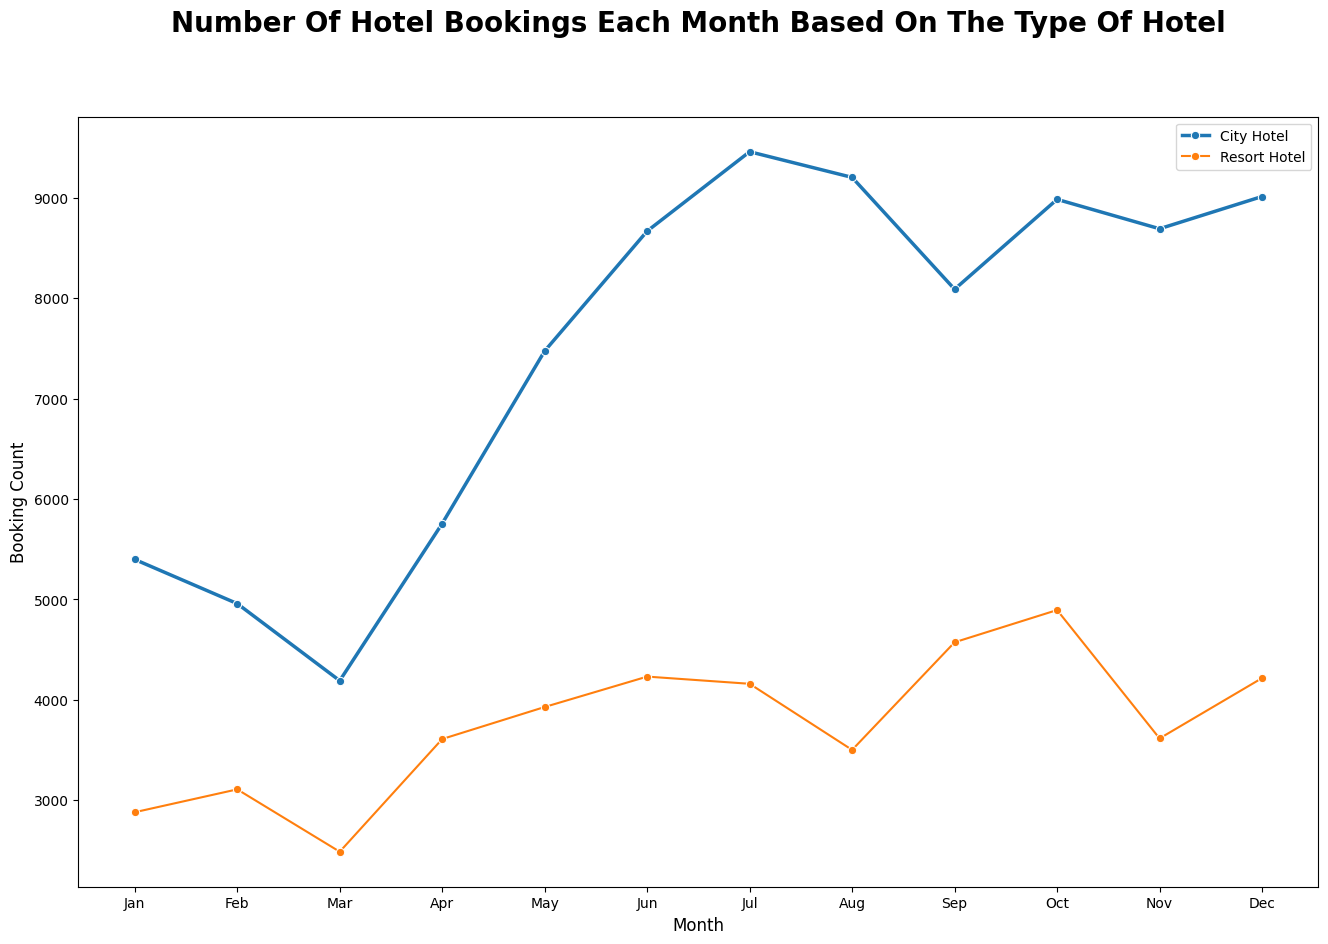

In [20]:
# Separate city hotel and resort hotel data
city_hotel = total_booking_counts.loc[total_booking_counts.hotel == 'City Hotel']
resort_hotel = total_booking_counts.loc[total_booking_counts.hotel == 'Resort Hotel']

# Plot line plot (trend)
plt.figure(figsize=(16, 10))
sns.lineplot(x='arrival_date_month', y='count_bookings', data=city_hotel, marker='o', label='City Hotel', linewidth=2.5)
sns.lineplot(x='arrival_date_month', y='count_bookings', data=resort_hotel, marker='o', label='Resort Hotel')

plt.legend()
plt.title('Number Of Hotel Bookings Each Month Based On The Type Of Hotel', fontsize=20, fontweight='bold', y=1.1)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Booking Count', fontsize=12)
plt.xticks(range(12), [month[:3] for month in months_order])  # Setting month labels
plt.show()


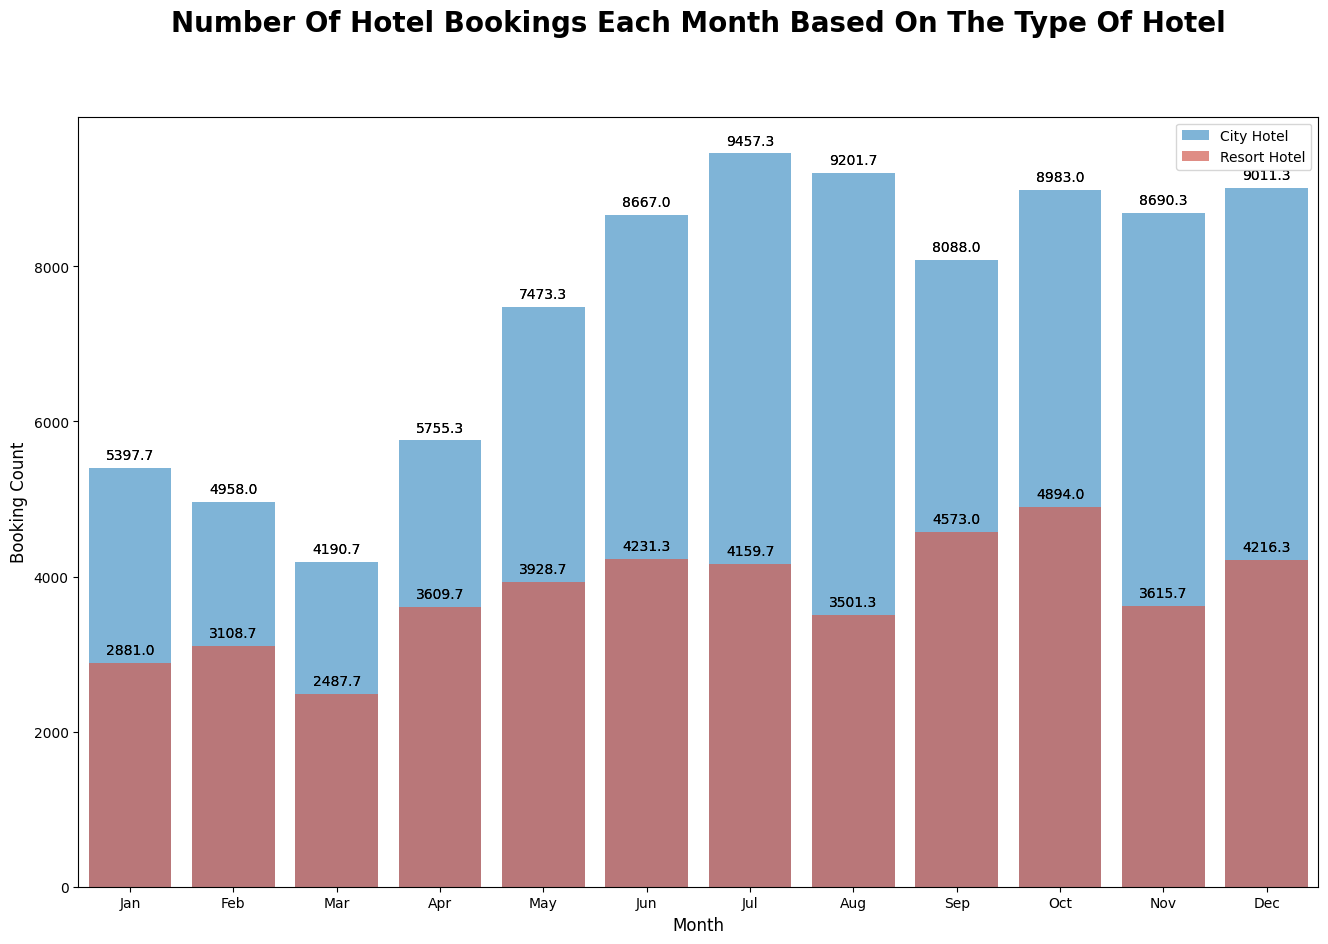

In [21]:
# Separate city hotel and resort hotel data
city_hotel = total_booking_counts.loc[total_booking_counts.hotel == 'City Hotel']
resort_hotel = total_booking_counts.loc[total_booking_counts.hotel == 'Resort Hotel']

# Plot bar plot (booking counts)
plt.figure(figsize=(16, 10))
city_barplot = sns.barplot(x='arrival_date_month', y='count_bookings', data=city_hotel, alpha=0.7, label='City Hotel', color='#3498db')
resort_barplot = sns.barplot(x='arrival_date_month', y='count_bookings', data=resort_hotel, alpha=0.7, label='Resort Hotel', color='#e74c3c')

plt.legend()
plt.title('Number Of Hotel Bookings Each Month Based On The Type Of Hotel', fontsize=20, fontweight='bold', y=1.1)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Booking Count', fontsize=12)

# Adding value annotations on top of each bar in city_hotel
for p in city_barplot.patches:
    city_barplot.annotate(format(p.get_height(), '.1f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points')

# Adding value annotations on top of each bar in resort_hotel
for p in resort_barplot.patches:
    resort_barplot.annotate(format(p.get_height(), '.1f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points')

plt.xticks(range(12), [month[:3] for month in months_order])  # Setting month labels
plt.show()


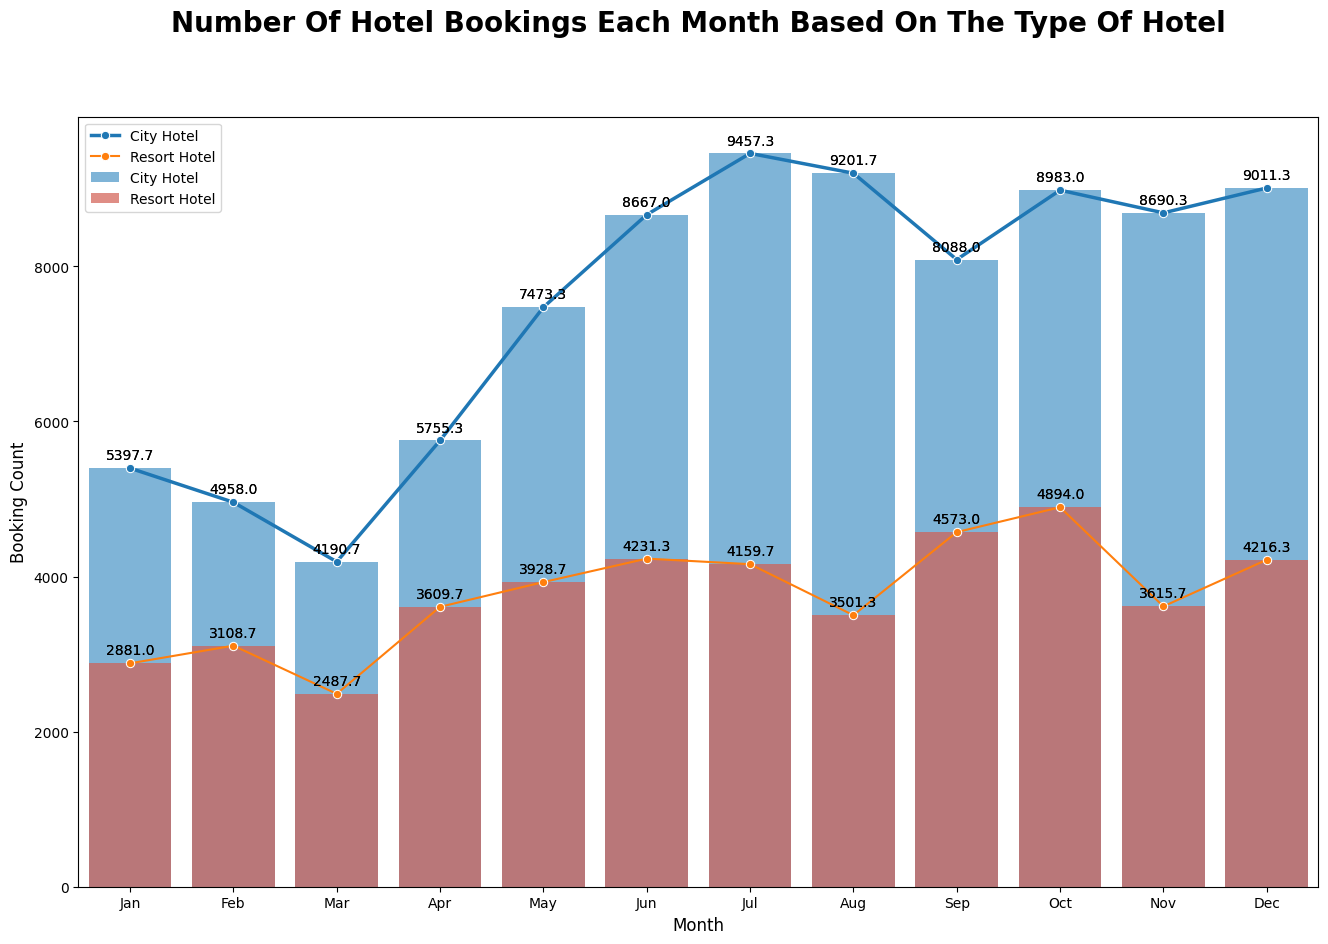

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


In [22]:
# Separate city hotel and resort hotel
city_hotel = total_booking_counts.loc[total_booking_counts.hotel == 'City Hotel']
resort_hotel = total_booking_counts.loc[total_booking_counts.hotel == 'Resort Hotel']

# Plot with lines to show trends
plt.figure(figsize=(16, 10))
sns.lineplot(x='arrival_date_month', y='count_bookings', data=city_hotel, marker='o', label='City Hotel', linewidth=2.5)
sns.lineplot(x='arrival_date_month', y='count_bookings', data=resort_hotel, marker='o', label='Resort Hotel')

# Plot with bars to show booking counts
city_barplot = sns.barplot(x='arrival_date_month', y='count_bookings', data=city_hotel, alpha=0.7, label='City Hotel', color='#3498db')
resort_barplot = sns.barplot(x='arrival_date_month', y='count_bookings', data=resort_hotel, alpha=0.7, label='Resort Hotel', color='#e74c3c')

plt.legend()
plt.title('Number Of Hotel Bookings Each Month Based On The Type Of Hotel', fontsize=20, fontweight='bold', y=1.1)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Booking Count', fontsize=12)

# Adding value annotations on top of each bar
for p in city_barplot.patches:
    city_barplot.annotate(format(p.get_height(), '.1f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points')

for p in resort_barplot.patches:
    resort_barplot.annotate(format(p.get_height(), '.1f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points')

plt.xticks(range(12), [month[:3] for month in months_order])  # Setting month labels
plt.show()
print(city_barplot)
print(resort_barplot)

Insight:

1.   Overall Trends:
    *   City Hotel: Bookings significantly increase from March to August, peak in August, then gradually decrease towards December.
    *   Resort Hotel: Bookings peak in the summer (June to August) but remain relatively steady compared to City Hotels.
2.   Monthly Bookings:
    *   January to March: Low bookings for both; City Hotels decline slightly, Resort Hotels remain stable.
    *   April to August: City Hotels show a noticeable increase, peaking in August. Resort Hotels also increase but more moderately.
    *   September to December: Both types see a decline after August; City Hotels drop more sharply but see a slight peak in December.
3.   Peak and Low Seasons:
    *   Peak Season: Summer months, especially August for City Hotels and June to August for Resort Hotels.
    *   Low Season: Early and late in the year, with the lowest in March for City Hotels and February for Resort Hotels.
4.   Comparative Analysis:
    *   City Hotel: Consistently higher booking counts than Resort Hotels throughout the year.
    *   Resort Hotel: Lower booking counts but more consistent month-to-month pattern compared to City Hotels.

By leveraging these insights, hotel managers can optimize operations and marketing strategies to enhance customer satisfaction and increase bookings.





# **Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates**

### Create a new column that contains the stay duration.

In [23]:
# Calculate Total Stay Duration by adding the 'stays_in_weekend_nights' and 'stays_in_week_nights' columns
dfh['stay_duration'] = dfh['stays_in_weekdays_nights'] + dfh['stays_in_weekend_nights']

# Display the dataframe to verify the new column
print(dfh)

               hotel   is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel  not canceled        342               2017   
1       Resort Hotel  not canceled        737               2017   
2       Resort Hotel  not canceled          7               2017   
3       Resort Hotel  not canceled         13               2017   
4       Resort Hotel  not canceled         14               2017   
...              ...           ...        ...                ...   
119385    City Hotel  not canceled         23               2019   
119386    City Hotel  not canceled        102               2019   
119387    City Hotel  not canceled         34               2019   
119388    City Hotel  not canceled        109               2019   
119389    City Hotel  not canceled        205               2019   

       arrival_date_month  arrival_date_week_number  \
0               September                        27   
1               September                        27   
2               Se

In [24]:
# Display the dataframe to verify the new column
dfh

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration
0,Resort Hotel,not canceled,342,2017,September,27,1,0,0,2,...,3,No Deposit,0.0,0,Personal,0.00,0,0,Check-Out,0
1,Resort Hotel,not canceled,737,2017,September,27,1,0,0,2,...,4,No Deposit,0.0,0,Personal,0.00,0,0,Check-Out,0
2,Resort Hotel,not canceled,7,2017,September,27,1,0,1,1,...,0,No Deposit,0.0,0,Personal,75.00,0,0,Check-Out,1
3,Resort Hotel,not canceled,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,0,Personal,75.00,0,0,Check-Out,1
4,Resort Hotel,not canceled,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,0,Personal,98.00,0,1,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,not canceled,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,0,Personal,96.14,0,0,Check-Out,7
119386,City Hotel,not canceled,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,0,Personal,225.43,0,2,Check-Out,7
119387,City Hotel,not canceled,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,0,Personal,157.71,0,4,Check-Out,7
119388,City Hotel,not canceled,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,0,Personal,104.40,0,0,Check-Out,7


In [25]:
dfh['stay_duration'].head()

0    0
1    0
2    1
3    1
4    2
Name: stay_duration, dtype: int64

In [26]:
dfh['stay_duration'].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stay_duration, dtype: float64

In [27]:
# Get frequency distribution for unique values in the stay_duration column
distribution_table = dfh['stay_duration'].value_counts().reset_index()
distribution_table.columns = ['Stay Duration', 'Frequency']

print(distribution_table.head(10))  # Displaying the first 10 rows

   Stay Duration  Frequency
0              2      27643
1              3      27076
2              1      21020
3              4      17383
4              7       8655
5              5       7784
6              6       3857
7              8       1161
8             10       1139
9             14        916


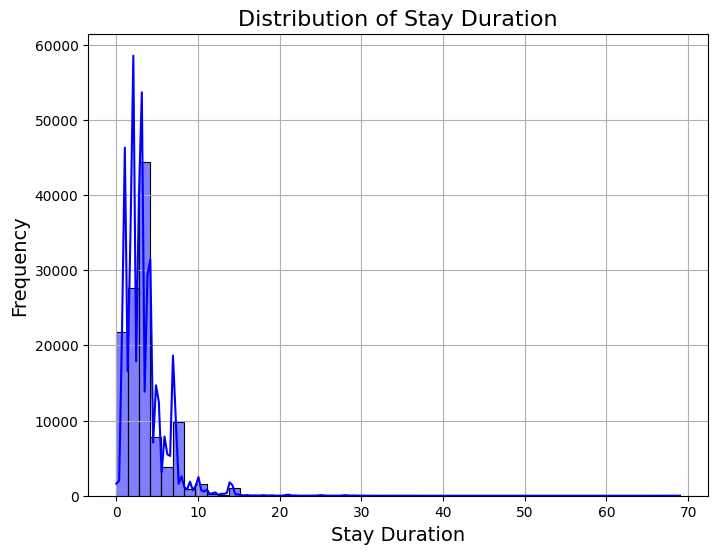

In [28]:
# Plot histogram of stay_duration using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(dfh['stay_duration'], bins=50, color='blue', edgecolor='black', kde=True)
plt.title('Distribution of Stay Duration', fontsize=16)
plt.xlabel('Stay Duration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

The distribution of `stay_duration` is highly right-skewed, indicating that the majority of stay durations are at lower values, particularly between 0 and 10 units. The frequency drops sharply after 10 units, with very few stay durations exceeding 20 units.

In [29]:
# Step 1: Make the bin boundaries
bin_boundaries = list(range(0, 11)) + [15, 20, np.inf]
# This makes bins like: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, inf]

# Step 2: Give each bin a name
bin_labels = ['0-1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11-15', '16-20', '>20']
# This makes labels like: ['0-1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11-15', '16-20', '>20']

# Step 3: Put the 'stay_duration' values into these bins
dfh['stay_duration_bins'] = pd.cut(dfh['stay_duration'], bin_boundaries, labels=bin_labels)

# Look at the result
dfh

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration,stay_duration_bins
0,Resort Hotel,not canceled,342,2017,September,27,1,0,0,2,...,No Deposit,0.0,0,Personal,0.00,0,0,Check-Out,0,NaN
1,Resort Hotel,not canceled,737,2017,September,27,1,0,0,2,...,No Deposit,0.0,0,Personal,0.00,0,0,Check-Out,0,NaN
2,Resort Hotel,not canceled,7,2017,September,27,1,0,1,1,...,No Deposit,0.0,0,Personal,75.00,0,0,Check-Out,1,0-1
3,Resort Hotel,not canceled,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0,Personal,75.00,0,0,Check-Out,1,0-1
4,Resort Hotel,not canceled,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0,Personal,98.00,0,1,Check-Out,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,not canceled,23,2019,October,35,30,2,5,2,...,No Deposit,394.0,0,Personal,96.14,0,0,Check-Out,7,7
119386,City Hotel,not canceled,102,2019,October,35,31,2,5,3,...,No Deposit,9.0,0,Personal,225.43,0,2,Check-Out,7,7
119387,City Hotel,not canceled,34,2019,October,35,31,2,5,2,...,No Deposit,9.0,0,Personal,157.71,0,4,Check-Out,7,7
119388,City Hotel,not canceled,109,2019,October,35,31,2,5,2,...,No Deposit,89.0,0,Personal,104.40,0,0,Check-Out,7,7




1.   Summary:
      *   Right-Skewed Distribution: Most guests stay for a short duration.
      *   High Frequency in Short Stays: Majority of stays are between 0-10 units.
      *   Few Long Stays: Very few stays exceed 20 units.

2.   Detailed Summary:
      *   0-1 units: Most common stay duration.
      *   2-10 units: Gradual decrease in frequency.
      *   More then 20 units: Very rare

This distribution suggests the hotel is popular for short stays, guiding marketing and resource planning strategies.

### Create a Summary Table Displaying The Cancellation Rate For Each Hotel Type.

In [30]:
# Step 1: Group the data and count bookings for each group
# Group by 'hotel', 'is_canceled', and 'stay_duration_bins'
grouped_data = dfh.groupby(['hotel', 'is_canceled', 'stay_duration_bins'], observed=True)['is_canceled'].count()
# Convert the grouped data into a DataFrame and rename the count column
data_cancel = grouped_data.reset_index(name='count')

# Step 2: Create a pivot table from the grouped data
# Define pivot table parameters
pivot_params = {
    'index': ['hotel', 'stay_duration_bins'],   # Index (rows) will be 'hotel' and 'stay_duration_bins'
    'columns': 'is_canceled',                   # Columns will be 'is_canceled'
    'values': 'count'                           # Values will be the 'count' of bookings
}
# Create the pivot table and reset the index
data_cancel_pivot = data_cancel.pivot(**pivot_params).reset_index()

# Step 3: Rename the columns for better readability
data_cancel_pivot.columns = ['hotel', 'stay_duration_bins', 'not_canceled', 'canceled']

# Step 4: Calculate the cancellation rate
# Add the 'not_canceled' and 'canceled' columns to get the total bookings
total_bookings = data_cancel_pivot['not_canceled'] + data_cancel_pivot['canceled']
# Calculate the cancellation rate as 'canceled' divided by 'total_bookings'
data_cancel_pivot['cancellation_rate'] = data_cancel_pivot['canceled'] / total_bookings

In [31]:

# Step 5: Display the final DataFrame
data_cancel_pivot

,hotel,stay_duration_bins,not_canceled,canceled,cancellation_rate
0,City Hotel,0-1,4103,9169,0.690853
1,City Hotel,2,10434,10992,0.513022
2,City Hotel,3,9486,11895,0.556335
3,City Hotel,4,4853,7704,0.613522
4,City Hotel,5,1776,3221,0.644587
5,City Hotel,6,943,1116,0.542011
6,City Hotel,7,808,1251,0.607576
7,City Hotel,8,176,209,0.542857
8,City Hotel,9,93,120,0.563380
9,City Hotel,10,116,83,0.417085


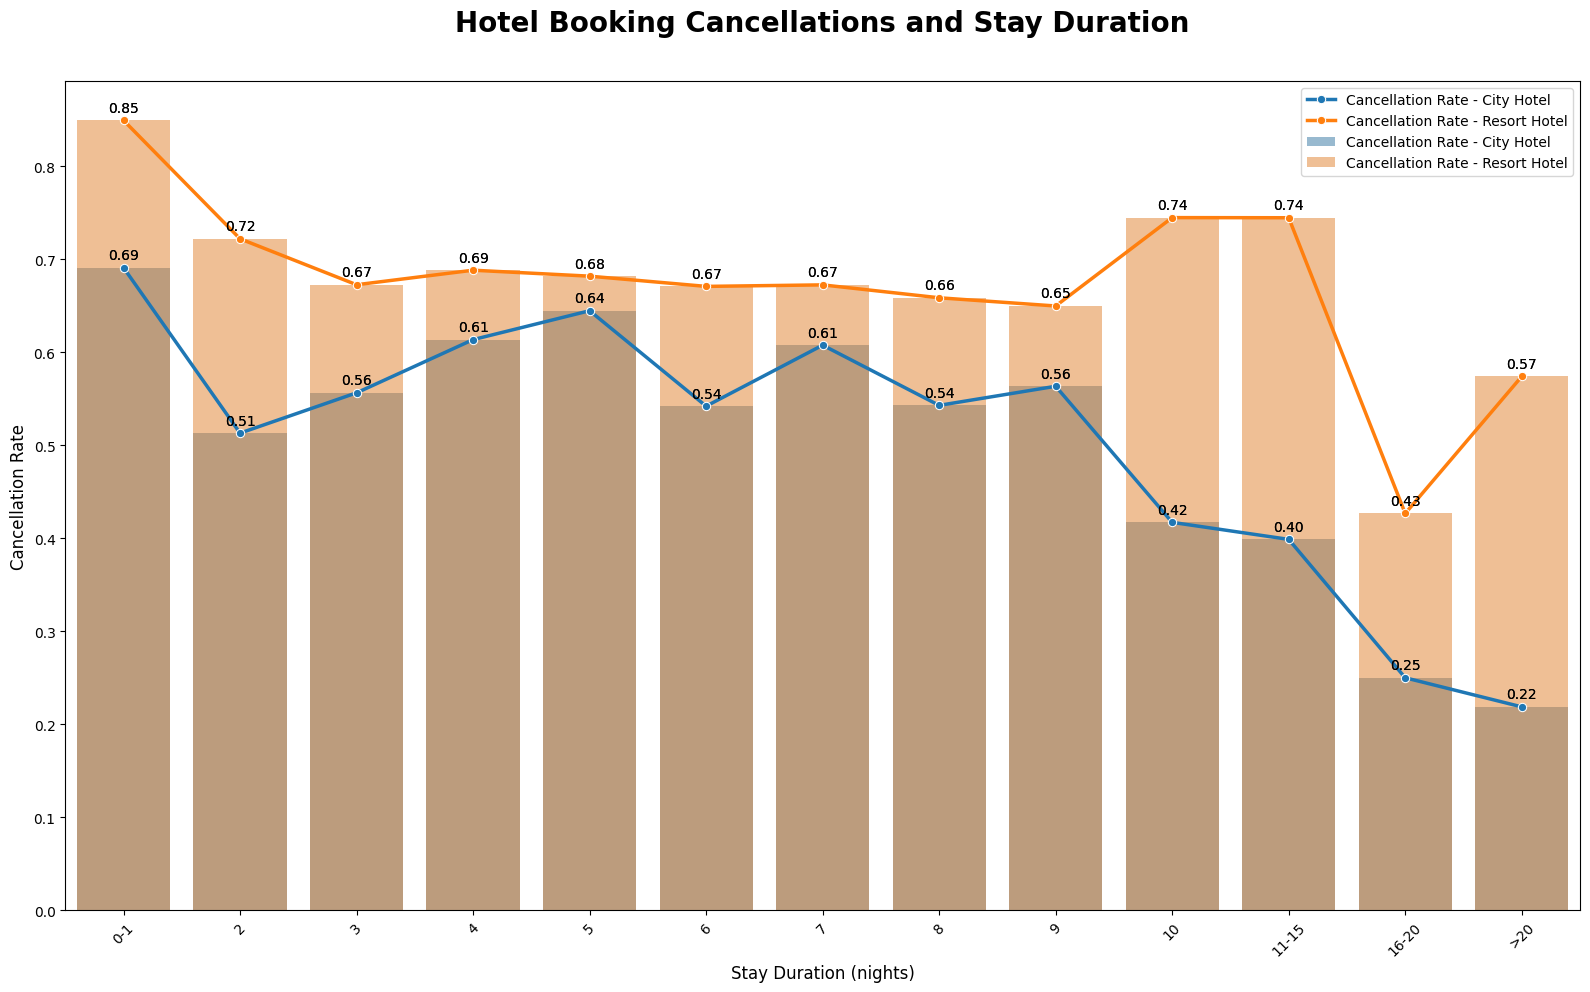

In [32]:
# Create a combined line plot and bar plot with annotations
plt.figure(figsize=(16, 10))

# Line plots to show trends
sns.lineplot(x='stay_duration_bins', y='cancellation_rate', data=data_cancel_pivot[data_cancel_pivot['hotel'] == 'City Hotel'], marker='o', label='Cancellation Rate - City Hotel', linewidth=2.5,)
sns.lineplot(x='stay_duration_bins', y='cancellation_rate', data=data_cancel_pivot[data_cancel_pivot['hotel'] == 'Resort Hotel'], marker='o', label='Cancellation Rate - Resort Hotel', linewidth=2.5,)

# Bar plots to show cancellation rates
city_hotel_barplot = sns.barplot(x='stay_duration_bins', y='cancellation_rate', data=data_cancel_pivot[data_cancel_pivot['hotel'] == 'City Hotel'], alpha=0.5, label='Cancellation Rate - City Hotel',)
resort_hotel_barplot = sns.barplot(x='stay_duration_bins', y='cancellation_rate', data=data_cancel_pivot[data_cancel_pivot['hotel'] == 'Resort Hotel'], alpha=0.5, label='Cancellation Rate - Resort Hotel',)

# Adding value annotations on top of each bar
for p in city_hotel_barplot.patches:
    city_hotel_barplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center',
                                xytext=(0, 9),
                                textcoords='offset points')

for p in resort_hotel_barplot.patches:
    resort_hotel_barplot.annotate(format(p.get_height(), '.2f'),
                                  (p.get_x() + p.get_width() / 2., p.get_height()),
                                  ha='center', va='center',
                                  xytext=(0, 9),
                                  textcoords='offset points')

plt.legend()
plt.title('Hotel Booking Cancellations and Stay Duration', fontsize=20, fontweight='bold', y=1.05)
plt.xlabel('Stay Duration (nights)', fontsize=12)
plt.ylabel('Cancellation Rate', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


The distinct patterns of hotel booking cancellations between city hotels and resort hotels are quite intriguing. The data reveals that:
1.   The city hotel cancellation rate is generally higher and more volatile compared to the resort hotel, especially for stay durations under 10 nights.
2.   However, the city hotel cancellation rate starts to increase significantly once the stay duration exceeds 10 nights.
3.   In contrast, the resort hotel cancellation rate remains relatively stable until the 16+ night stays, where it then increases more sharply.

These divergent patterns suggest that guests staying at city hotels tend to be more flexible in adjusting their travel plans, particularly for longer durations. On the other hand, resort hotel guests appear to be more committed to their bookings, especially for shorter stay periods.


# **Impact Analysis Of Lead Time On Hotel Bookings Cancellation Rates**

In [33]:
# Display the dataframe
dfh

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration,stay_duration_bins
0,Resort Hotel,not canceled,342,2017,September,27,1,0,0,2,...,No Deposit,0.0,0,Personal,0.00,0,0,Check-Out,0,NaN
1,Resort Hotel,not canceled,737,2017,September,27,1,0,0,2,...,No Deposit,0.0,0,Personal,0.00,0,0,Check-Out,0,NaN
2,Resort Hotel,not canceled,7,2017,September,27,1,0,1,1,...,No Deposit,0.0,0,Personal,75.00,0,0,Check-Out,1,0-1
3,Resort Hotel,not canceled,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0,Personal,75.00,0,0,Check-Out,1,0-1
4,Resort Hotel,not canceled,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0,Personal,98.00,0,1,Check-Out,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,not canceled,23,2019,October,35,30,2,5,2,...,No Deposit,394.0,0,Personal,96.14,0,0,Check-Out,7,7
119386,City Hotel,not canceled,102,2019,October,35,31,2,5,3,...,No Deposit,9.0,0,Personal,225.43,0,2,Check-Out,7,7
119387,City Hotel,not canceled,34,2019,October,35,31,2,5,2,...,No Deposit,9.0,0,Personal,157.71,0,4,Check-Out,7,7
119388,City Hotel,not canceled,109,2019,October,35,31,2,5,2,...,No Deposit,89.0,0,Personal,104.40,0,0,Check-Out,7,7


In [34]:
dfh['lead_time'].head()

0    342
1    737
2      7
3     13
4     14
Name: lead_time, dtype: int64

In [35]:
# statistical summary from 'lead_time'
dfh['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [36]:
# Get frequency distribution for unique values in the 'lead_time' column
distribution_table_ld = dfh['lead_time'].value_counts().reset_index()
distribution_table_ld.columns = ['Lead Time', 'Frequency']

print(distribution_table_ld.head(10))  # Displaying the first 10 rows

   Lead Time  Frequency
0          0       6345
1          1       3460
2          2       2069
3          3       1816
4          4       1715
5          5       1565
6          6       1445
7          7       1331
8          8       1138
9         12       1079


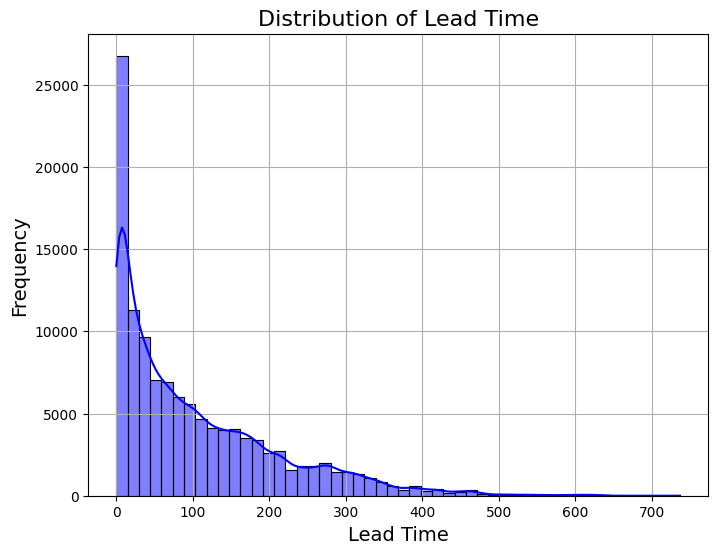

In [37]:
# Plot histogram of lead_time using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(dfh['lead_time'], bins=50, color='blue', edgecolor='black', kde=True)
plt.title('Distribution of Lead Time', fontsize=16)
plt.xlabel('Lead Time', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

The distribution of `lead_time` is highly right-skewed, indicating that the majority of lead times are at lower values, particularly between the lower end of the range. The frequency drops sharply after a certain point, with very few lead times exceeding higher values in the range.

### Group Values from the Lead Time Column into Bins

In [38]:
# Define the lead time categories
lead_time_conditions = [
    dfh['lead_time'] <= 30,  # Less than or equal to 30 days
    (dfh['lead_time'] > 30) & (dfh['lead_time'] <= 120),  # Between 31 and 120 days
    (dfh['lead_time'] > 120) & (dfh['lead_time'] <= 210),  # Between 121 and 210 days
    (dfh['lead_time'] > 210) & (dfh['lead_time'] <= 300),  # Between 211 and 300 days
    (dfh['lead_time'] > 300) & (dfh['lead_time'] <= 365),  # Between 301 and 365 days
    dfh['lead_time'] > 365  # More than 365 days
]

# Define the names for each category
lead_time_labels = [
    'Less than 1 month', '1-3 months', '4-6 months',
    '7-9 months', '10-12 months', 'More than 12 months'
]

# Create a new column 'lead_time_group' in the dataframe
dfh['lead_time_group'] = np.select(lead_time_conditions, lead_time_labels)

# Show the result
dfh[['lead_time', 'lead_time_group']].head()

,lead_time,lead_time_group
0,342,10-12 months
1,737,More than 12 months
2,7,Less than 1 month
3,13,Less than 1 month
4,14,Less than 1 month


### Create an Aggregate Table Showing the Cancellation Ratio by Lead Time for Each Hotel Type

In [39]:
# Step 1: Group the DataFrame 'dfh' by 'hotel', 'is_canceled', and 'lead_time_group' to organize the data.
df_lead_time = dfh.groupby(['hotel', 'is_canceled', 'lead_time_group'])['is_canceled'].count().reset_index(name='count')

# Step 2: Pivot the 'data_lt' DataFrame to create a new DataFrame,
pivot_df_lead_time =df_lead_time.pivot(index=['hotel', 'lead_time_group'], columns='is_canceled', values='count').reset_index()

# Step 3: Rename the columns of 'pivot_df_lead_time' to enhance clarity and readability.
new_columns = ['Hotel Type', 'Lead Time Group', 'Canceled Bookings', 'Non-canceled Bookings']
pivot_df_lead_time.columns = new_columns

# Step 4: Calculate the cancellation rate by dividing the number of canceled bookings
# by the total bookings (canceled and non-canceled).
pivot_df_lead_time['Cancellation Rate'] = pivot_df_lead_time['Canceled Bookings'] / (pivot_df_lead_time['Canceled Bookings'] + pivot_df_lead_time['Non-canceled Bookings'])

pivot_df_lead_time

,Hotel Type,Lead Time Group,Canceled Bookings,Non-canceled Bookings,Cancellation Rate
0,City Hotel,1-3 months,11786,16458,0.417292
1,City Hotel,10-12 months,2760,742,0.788121
2,City Hotel,4-6 months,7053,7317,0.490814
3,City Hotel,7-9 months,4381,2767,0.612899
4,City Hotel,Less than 1 month,5199,18163,0.222541
5,City Hotel,More than 12 months,1923,781,0.711169
6,Resort Hotel,1-3 months,4000,7743,0.340628
7,Resort Hotel,10-12 months,520,717,0.420372
8,Resort Hotel,4-6 months,2686,4609,0.368197
9,Resort Hotel,7-9 months,1723,2274,0.431073


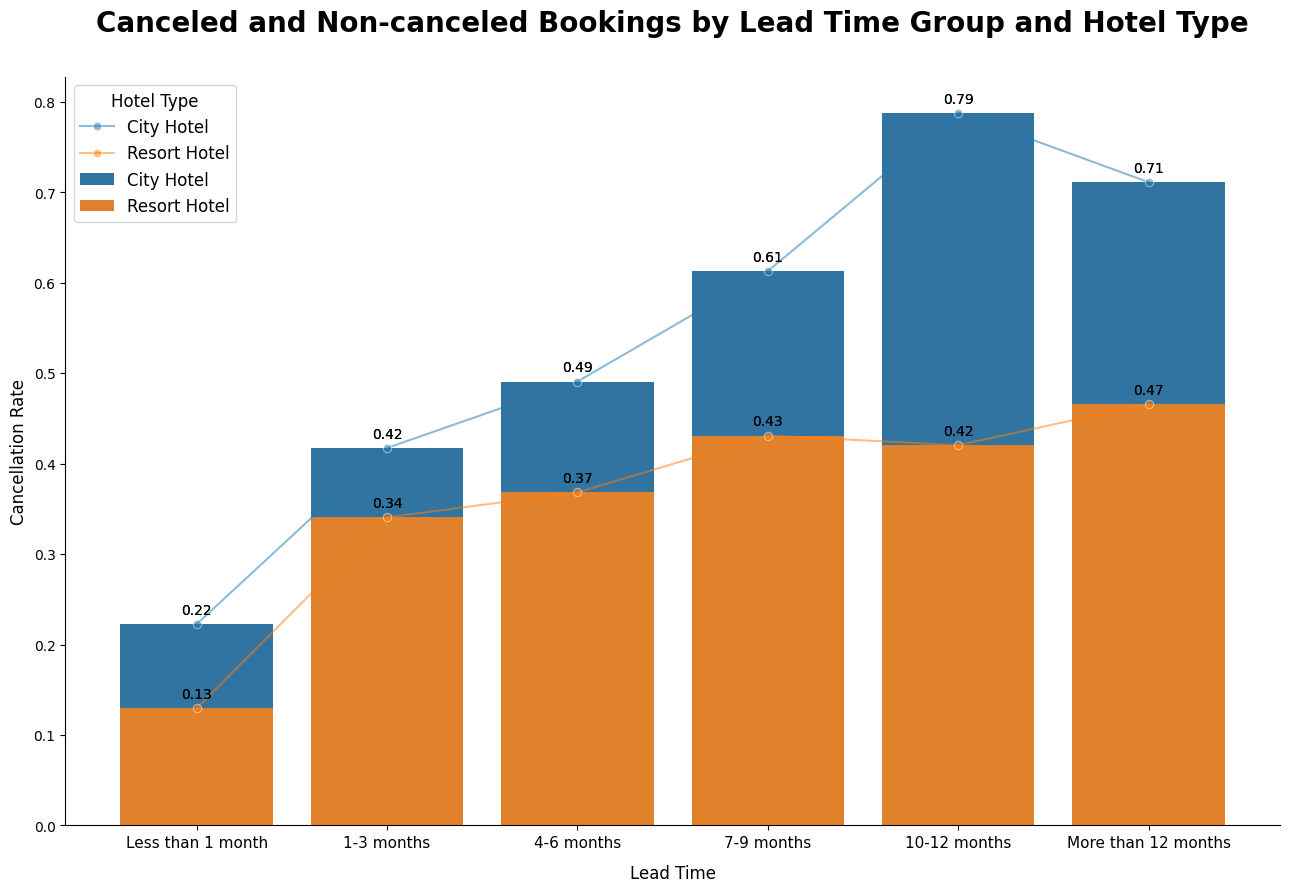

In [40]:
plt.figure(figsize=(13, 9))

# Stacked barplot for City hotel
city_barplot = sns.barplot( x='Lead Time Group',y='Cancellation Rate',data=pivot_df_lead_time[pivot_df_lead_time['Hotel Type'] == 'City Hotel'],label='City Hotel',order=lead_time_labels,alpha=1)
resort_barplot = sns.barplot(x='Lead Time Group',y='Cancellation Rate',data=pivot_df_lead_time[pivot_df_lead_time['Hotel Type'] == 'Resort Hotel'],label='Resort Hotel',order=lead_time_labels,alpha=1)

# Line plot for City hotel
sns.lineplot(x='Lead Time Group',y='Cancellation Rate', data=pivot_df_lead_time[pivot_df_lead_time['Hotel Type'] == 'City Hotel'],marker='o',label='City Hotel',linewidth=1.5,alpha=0.5)
sns.lineplot(x='Lead Time Group',y='Cancellation Rate', data=pivot_df_lead_time[pivot_df_lead_time['Hotel Type'] == 'Resort Hotel'],marker='o',label='Resort Hotel',linewidth=1.5,alpha=0.5)

sns.despine()

plt.legend(title='Hotel Type', title_fontsize='12', fontsize='12', prop={'size': 12}, loc='upper left')
plt.title('Canceled and Non-canceled Bookings by Lead Time Group and Hotel Type', fontsize=20, fontweight='bold', y=1.05)
plt.xlabel('Lead Time', fontsize=12, labelpad=10)
plt.xticks(fontsize=11)
plt.ylabel('Cancellation Rate', fontsize=12)

# Annotations for bars
for p in city_barplot.patches:
    city_barplot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points')

for p in resort_barplot.patches:
    resort_barplot.annotate(format(p.get_height(), '.2f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points')

plt.tight_layout()
plt.show()

*   `City Hotels`: Higher cancellation rates, increasing with longer lead times, peaking at 0.79 for bookings over 12 months in advance.
*   `Resort Hotels`: Lower and more stable cancellation rates, with a maximum of 0.47 for bookings over 12 months in advance.